<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/iris">Jeu de données Iris - Iris de Fisher ou Iris d'Anderson</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris.jpg" width="96"></th>
 </tr>
</table>

<table>
    <tr>                                                                                   
         <th  style="text-align:left;background-color:#053061;color:white;">Setosa</th>
         <th  style="text-align:left;background-color:#053061;color:white;">Virginica</th>
         <th  style="text-align:left;background-color:#053061;color:white;">Versicolor</th>
    </tr>
    <tr>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_setosa.jpg" width="512"></th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_virginica.jpg" width="512"></th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_versicolor.jpg" width="512"></th>
    </tr>
</table>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/53/iris">Veuillez vous référer à la page UC Irvine Machine Learning Repository officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [5]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go
import graphviz, pydotplus
from IPython.display import Image
import re
from scipy.cluster.hierarchy import linkage, dendrogram



warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)

#os.chdir("C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/MachineLearning/donnees/Iris")



In [6]:
!dir

 Le volume dans le lecteur C s'appelle Windows-SSD
 Le num�ro de s�rie du volume est 84DC-AF7F

 R�pertoire de c:\Users\etien\Documents\CCI\_HUB\2024-2025\big_data\_git\MachineLearning\Clustering-Classification.non.supervis�e\TP

27/01/2025  11:24    <DIR>          .
27/01/2025  11:20    <DIR>          ..
27/01/2025  11:38           881�414 Iris_classification_kmeans.ipynb
               1 fichier(s)          881�414 octets
               2 R�p(s)  668�368�736�256 octets libres


In [7]:
sys.path.append(os.path.abspath('../../outils/'))
from prjFormation import palette

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier,export_graphviz

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

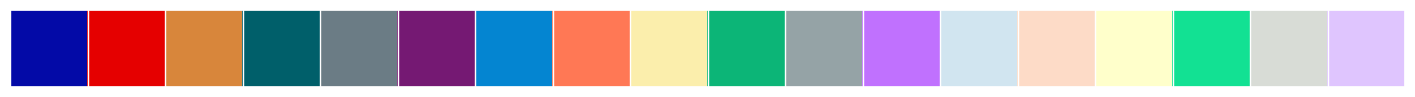

In [9]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [10]:
def formatPct(pct, allvals):
    total = int(round(pct/100. * np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, total)    

In [11]:
def affichageDistribution(colonne,couleur,ax, nom=''):
    graph = sns.distplot(colonne, color=couleur, ax=ax)
    graph.set(ylabel=None)
    moyenne, mediane = float(colonne.mean()), \
                   float(colonne.median())
    
    ax.axvline(moyenne, color='g', linestyle='-', label=f"{nom:12s} mean   = {moyenne:0.4f}", lw=2)
    ax.axvline(mediane, color='b', linestyle='--', label=f"{nom:12s} median = {mediane:0.4f}", lw=2)
    graph.legend(loc="upper right")

In [12]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante')
        plt.xlabel('Villes ou (taille du cluster)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

<table>
    <tr> 
        <th  style="text-align:left">
            <table>
                <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>Iris.csv</CAPTION>    
            <tr>                                                                                   
                <tr>                                                                                   
                     <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
                     <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Id</th>
                    <th  style="text-align:left">Index</th>
                </tr>
                <tr>
                    <th  style="text-align:left">SepalLengthCm</th>
                    <th  style="text-align:left">Longueur du sépale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">SepalWidthCm</th>
                    <th  style="text-align:left">Largeur du sépale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">PetalLengthCm</th>
                    <th  style="text-align:left">Longueur du pétale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">PetalWidthCm</th>
                    <th  style="text-align:left">Largeur du pétale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left;color:red;">Species</th>
                    <th  style="text-align:left;color:red;">Classe d'iris : Iris Setosa, Iris Versicolour ou Iris Virginica</th>
                </tr>
            </table>
        </th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_description.jpg" width="1024"></th>
    </tr>
</table>

In [13]:
donnees = pd.read_csv('C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/MachineLearning/donnees/Iris/Iris.csv')
donnees.Species = donnees.Species.apply(lambda x : x.replace('Iris-',''))
donnees.columns = [colonne.replace('Cm','') if colonne != 'Species' else colonne for colonne in donnees.columns]
donnees.set_index('Id',inplace=True)
donnees.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
donnees.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Espèces de iris</div></b>

In [15]:
donnees.Species.sort_values().unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
dict_species = {nom:i for i, nom in enumerate(donnees.Species.sort_values().unique())}
dictR_species = {i:nom for i, nom in enumerate(donnees.Species.sort_values().unique())}
dict_species,dictR_species

({'setosa': 0, 'versicolor': 1, 'virginica': 2},
 {0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [17]:
donnees.Species = donnees.Species.apply(lambda x: dict_species[x])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Statistiques descriptives et analyse de données</div></b>

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Couleurs variables qualitatives</div></b>

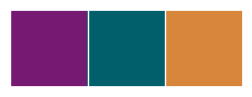

In [18]:
couleursEspece = {nom:couleur for nom,couleur in zip(donnees.Species.sort_values().unique(),["#751973","#005f6a","#d8863b"])}
couleursEspeceNom = {dictR_species[num]:couleursEspece[num] for num in couleursEspece}
sns.palplot(sns.color_palette(couleursEspece.values()))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Statistiques  descriptives</div></b>

In [19]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
52,6.4,3.2,4.5,1.5,1
87,6.7,3.1,4.7,1.5,1
137,6.3,3.4,5.6,2.4,2
32,5.4,3.4,1.5,0.4,0
101,6.3,3.3,6.0,2.5,2


In [20]:
donnees.describe().style.format("{:0.2f}") #.background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,1.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [21]:
donnees.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Structure de l’échantillon des données </div></b>

In [22]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
147,6.3,2.5,5.0,1.9,2
137,6.3,3.4,5.6,2.4,2
40,5.1,3.4,1.5,0.2,0
70,5.6,2.5,3.9,1.1,1
16,5.7,4.4,1.5,0.4,0


In [23]:
donnees.groupby(['Species']).SepalLength.count().reset_index()

,Species,SepalLength
0,0,50
1,1,50
2,2,50


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Distribution de l’échantillon des données </div></b>

In [24]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
21,5.4,3.4,1.7,0.2,0
25,4.8,3.4,1.9,0.2,0
98,6.2,2.9,4.3,1.3,1
88,6.3,2.3,4.4,1.3,1
121,6.9,3.2,5.7,2.3,2


### IMportation des Librairies Kmeans 

In [44]:
import sys
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score 
sys.path.append(os.path.abspath('../../outils/'))
from prjFormation import palette
from prjClustering import afficheKMeansClusters, affichageClusters,\
                          affichageChoixNombreClusters, retrouveDFCluster, \
                          afficheGraphiqueSilhouettes, affichageClusters, \
                          afficheSilhouettesClusters, afficheSilhouettesClustersH, afficheSilhouettesClustersV, \
                          bic_score, executionKMeans

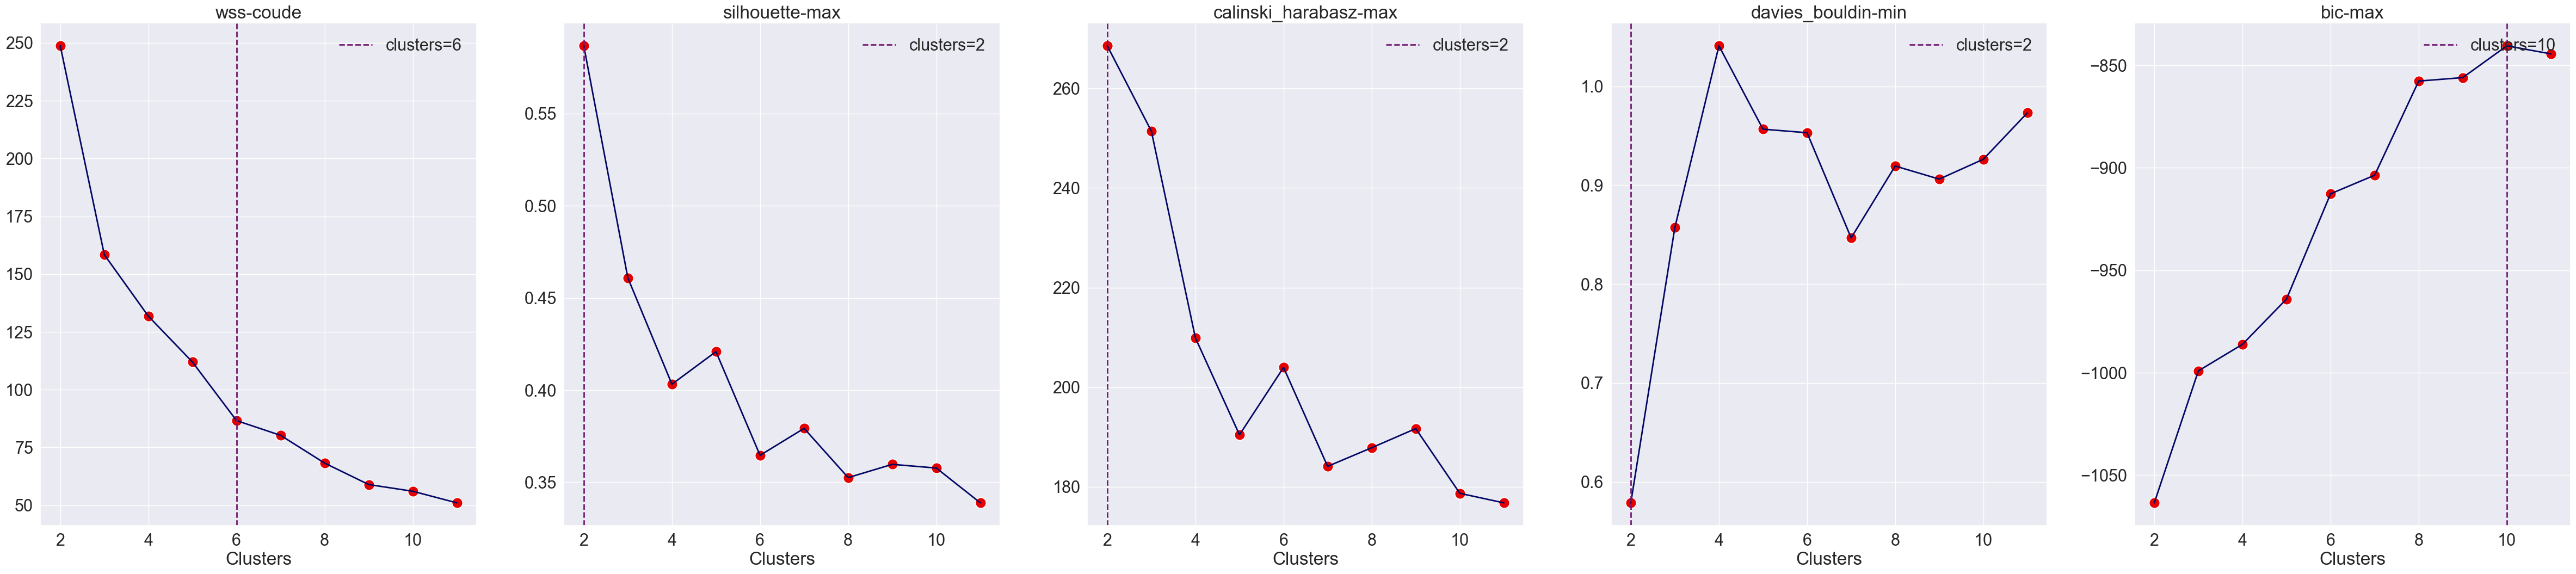

In [45]:
infoKMeans = executionKMeans(donnees, listeClusters=[i for i in range(2,12)])
affichageChoixNombreClusters(infoKMeans, tailleImage=12)


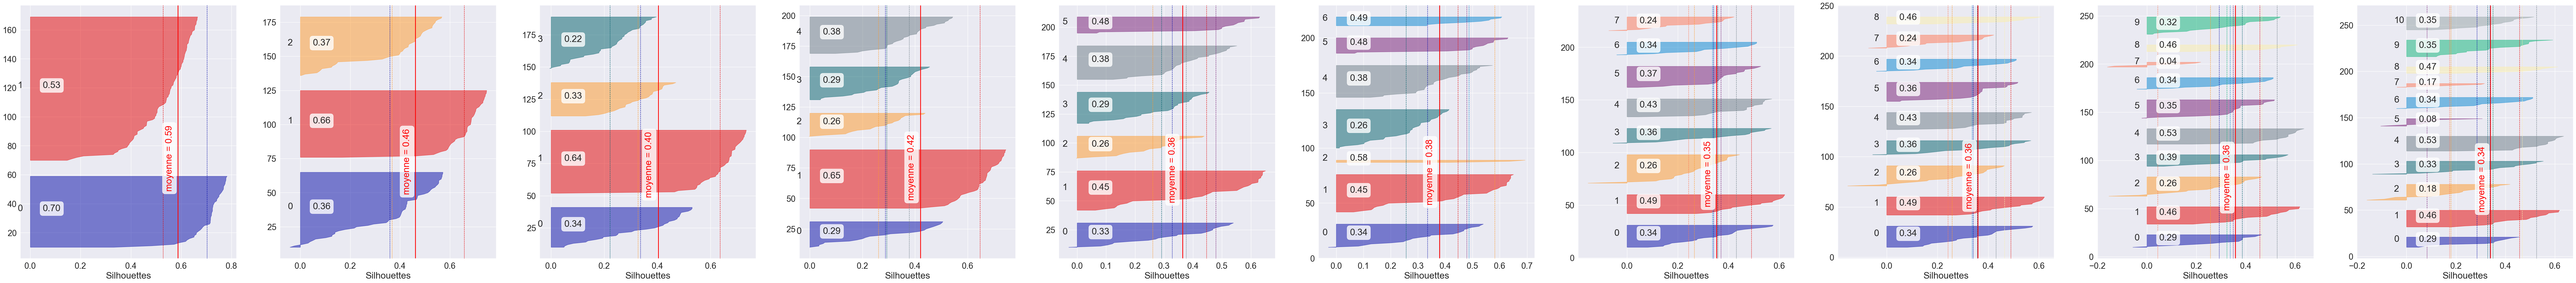

In [46]:
afficheSilhouettesClusters(donnees, infoKMeans, tailleImage=12)